In [1]:
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
import numpy as np
from imblearn.over_sampling import SMOTE
import pandas as pd

def calculate_abs_diff(data, mu):
    n = len(data)
    data=pd.DataFrame(data)
    abs_diff_sum = 0
    for i in range(n):
        abs_diff_sum += abs(data.iloc[i] - mu)
    return abs_diff_sum

In [2]:
n_values = list(range(10, 10000, 100))

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
# Define the range of values of n
abs_diff_X = []
abs_diff_X_filtered = []
sum=0
# Define the imbalance ratio
imbalance_ratio = 0.1  # 10% of the minority class

# Generate imbalanced datasets for each value of n
imbalanced_data_sets = {}
for n in n_values:
    # Calculate the number of samples for each class
    n_majority = int(n * (1 - imbalance_ratio))
    n_minority = n - n_majority

    # Generate a binary classification dataset with imbalanced classes
    X, y = make_classification(n_samples=n, n_features=1, n_informative=1, n_redundant=0,
                               n_clusters_per_class=1, weights=[1-imbalance_ratio, imbalance_ratio],
                               flip_y=0, random_state=42)

    n_outliers = int(0.05 * n)  # 5% of the samples as outliers
    X_outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 1))
    y_outliers = np.random.randint(0, 2, size=n_outliers)  # Random labels for outliers

    # Combine dataset with outliers
    X = np.concatenate([X, X_outliers])
    y = np.concatenate([y, y_outliers])

    # Shuffle the dataset
    X, y = shuffle(X, y, random_state=42)

    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    threshold = 3 * std
    X_filtered = X[~np.any(np.abs(X - mean) >= threshold, axis=1)]
    y_filtered = y[:len(X_filtered)]  # Update labels accordingly
    y=pd.DataFrame(y)
    y_filtered=pd.DataFrame(y_filtered)
    n_generated_data=int(y.value_counts()[1]*0.05)
    # Apply SMOTE to balance the dataset with 5% minority class
    smote = SMOTE(sampling_strategy={0:y.value_counts()[0] , 1:y.value_counts()[1]+n_generated_data}, random_state=42)
    X, y = smote.fit_resample(X, y)
    smote = SMOTE(sampling_strategy={0:y_filtered.value_counts()[0] , 1:y_filtered.value_counts()[1]+n_generated_data }, random_state=42)
    X_filtered, y_filtered = smote.fit_resample(X_filtered, y_filtered)
    abs_diff_X.append(calculate_abs_diff(X,mean)[0])
    abs_diff_X_filtered.append(calculate_abs_diff(X_filtered,mean)[0])
    if calculate_abs_diff(X_filtered,mean)[0]<=calculate_abs_diff(X,mean)[0]:
      sum+=1
print(sum)

100


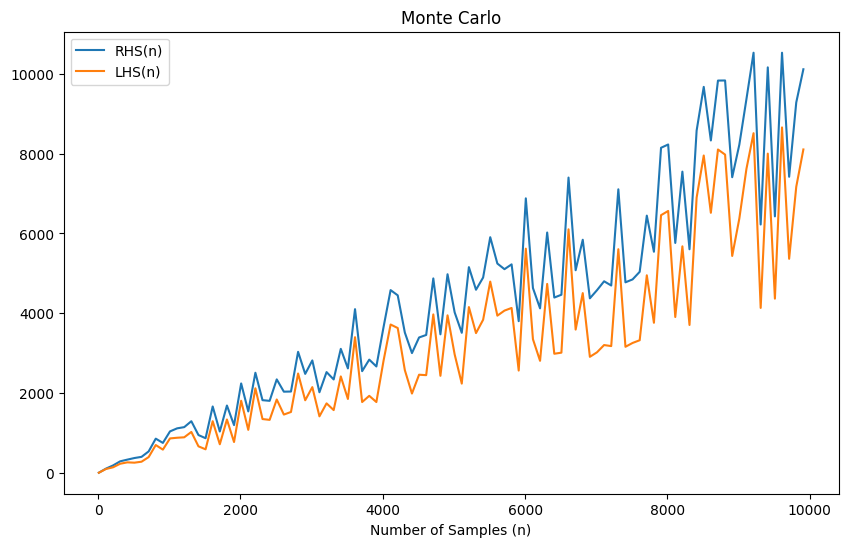

In [4]:
# Define the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plot the results
plt.plot(n_values, abs_diff_X, label='RHS(n)')
plt.plot(n_values, abs_diff_X_filtered, label='LHS(n)')
plt.xlabel('Number of Samples (n)')
plt.title('Monte Carlo')
plt.legend()
# Save the plot as SVG
plt.savefig('monte_carlo_plot.svg', format='svg')

# Save the plot as EPS
plt.savefig('monte_carlo_plot.eps', format='eps')
plt.show()